In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from threading import Timer
#from Quarto import *
#from keras_sequential_ascii import sequential_model_to_ascii_printout

# Basic algo 

In [47]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output/losses.txt')

Epochs: 705900
Selected: 705800
1) Mean: 4186.970368
Std: 1958.39312716


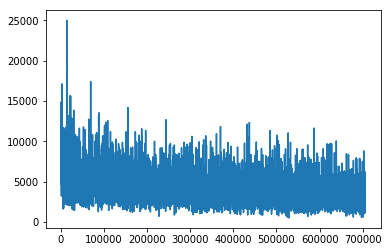

[ 3430.31982422  3673.765625    4286.19921875  4347.04003906  5032.61376953
  3615.49707031  1780.46850586  4266.21728516  3387.74951172   940.52514648
  2903.63183594  3120.36791992  3688.07128906  8796.15527344  3354.83666992
  3100.9675293   1772.72290039  3178.78100586  3725.01977539  1733.72705078
  3121.06982422  3982.68774414  3838.0234375   1590.30810547  2445.44873047
  2974.81201172  2212.91455078  2239.45922852  2890.17675781  2908.43725586
  4850.86279297  2085.3125      1944.28417969  1498.32495117  2234.95458984
  2805.01123047  6250.22851562  1920.12121582  1411.94689941  3005.74853516
  2994.36230469  1079.9777832   1283.04968262  3305.41601562  1923.29296875
  1831.77246094  2904.91796875  3453.76245117  5613.359375    2278.91113281]


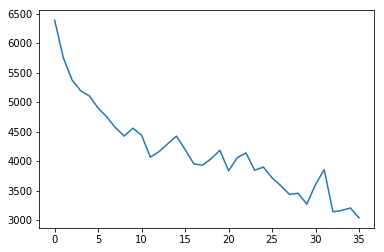

In [48]:
i = 100
data = np.array([float(x) for x in r.text.split("\n")[500:]])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 200
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

# Prioritized Experience Replay

In [51]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses.txt')

Epochs: 369900
Selected: 369800
1) Mean: 10884.2513071
Std: 3907.4448149


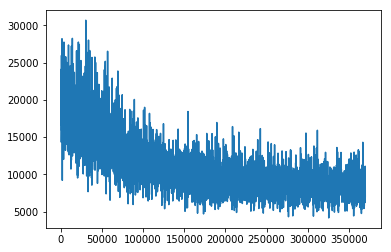

[  6670.33740234   6299.73339844   4753.16601562   7687.67382812
   5267.66601562   7977.68164062   7006.296875    10272.1181641
   8724.46679688   8246.29199219   8021.60253906  11268.8789062
   8585.53710938   6474.02929688   8201.5          6516.08007812
   8141.421875     6501.99609375   8229.48339844  14303.9453125
  12102.4521484    7816.14990234   5786.41503906   9866.53320312
   8627.11132812   5756.57519531  11114.1894531    9772.83300781
   8172.1796875    7845.06445312   7332.81689453  11022.6533203
   8239.06152344   5423.00097656   8127.41113281   7349.03564453
   7149.1171875    5748.15234375   8857.91601562   9588.95996094
   6761.70117188   8486.29882812   6183.14941406  10823.265625
   8265.60351562   6744.50830078   6279.84765625   9694.2265625
  11089.7880859    7025.29101562]


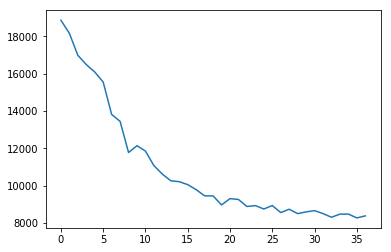

In [52]:
text = r.text
#with open("output/losses.txt") as file:
#    text = file.read()
i = 100
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 100
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [53]:
s = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses_details.txt')

In [54]:

#with open("output/losses_details.txt") as file:
#    text = file.read()
cut = False

text = s.text
losses = []
pieces = []
rewards = []
data = np.array([x.split(" ") for x in text.split("\n")])
for d in data[:-1]:
    losses.append(float(d[0]))
    rewards.append(int(d[1]))
    pieces.append(int(d[2]))

if cut:
    if len(losses)> 16000:
        losses = losses[-16000:]
        rewards = rewards[-16000:]
        pieces = pieces[-16000:]
    
lo = np.array(losses) 
print(len(rewards), len(lo[lo<5000]), len(lo[lo>50000]))

118368 49714 2665


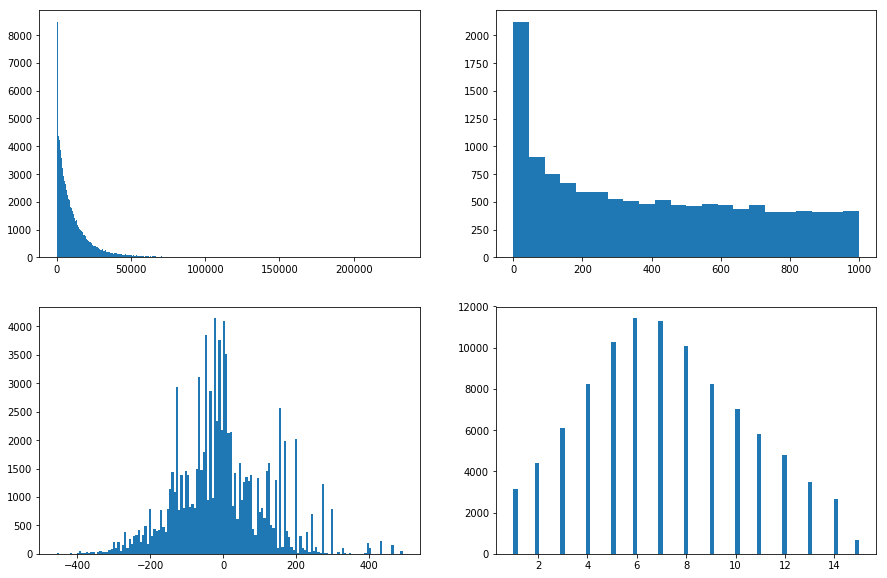

In [22]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].hist(losses,'auto')
xarr[0,1].hist(lo[lo<1000],'auto')
xarr[1,0].hist(rewards,'auto')
xarr[1,1].hist(pieces,'auto')
plt.show()

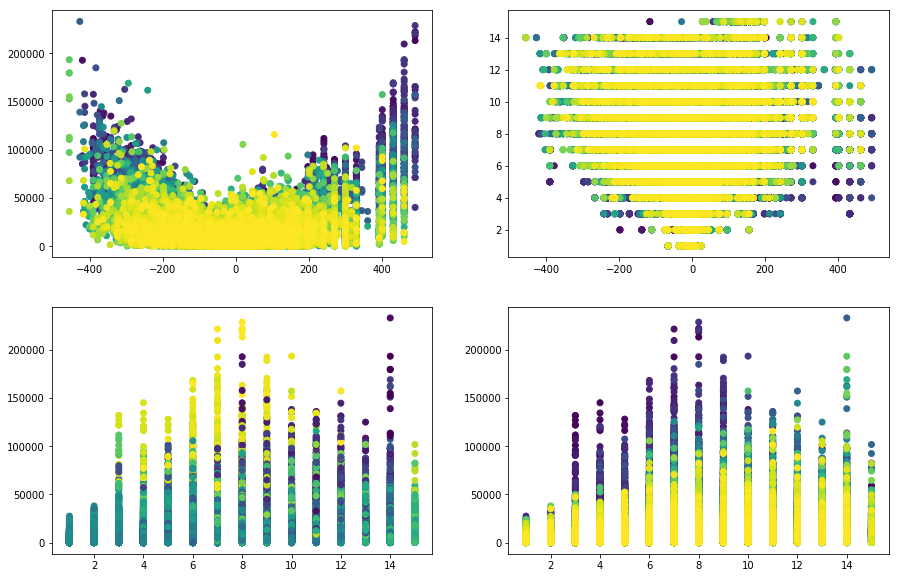

In [39]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards, losses, c=range(len(pieces)))
xarr[0,1].scatter(rewards, pieces,c=range(len(pieces)))
xarr[1,0].scatter(pieces, losses,c=rewards)
xarr[1,1].scatter(pieces, losses,c=range(len(rewards)))
plt.show()

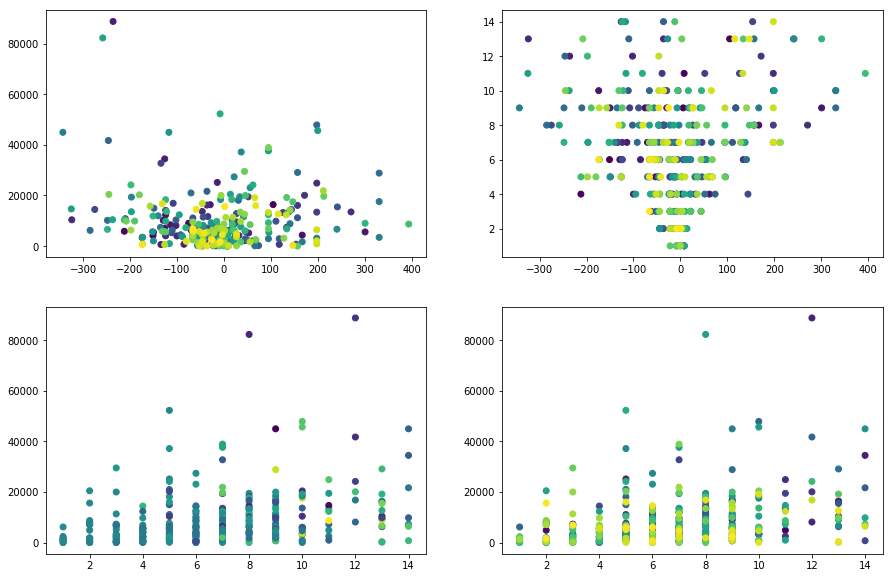

In [40]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards[-320:], losses[-320:], c=range(320))
xarr[0,1].scatter(rewards[-320:], pieces[-320:],c=range(320))
xarr[1,0].scatter(pieces[-320:], losses[-320:],c=rewards[-320:])
xarr[1,1].scatter(pieces[-320:], losses[-320:],c=range(320))
plt.show()

# Smaller reward test

Epochs: 39900
Selected: 38600
1) Mean: 24.1938162404
Std: 18.1102109342


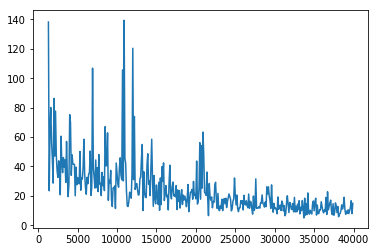

[  9.85854721  15.89842129  18.40810585   6.97260714  13.78293037
   7.96585464   8.07271481  10.54089069  10.5073452   16.0364933
  13.09210587   9.88846779   8.44422817  10.35425663   9.48142529
  18.96139526   7.34792566  22.7817955   10.52148628  12.87700462
  15.33909512  17.13003349   9.59840775   7.26842213  14.70409012
   6.85289383   8.78415966  15.26613903  13.2690239    8.60740471
  12.83287811   5.82299042   7.434165     8.19199276  10.12512493
  13.91533089  11.0521431   13.27178955  19.05642891  10.79539394
   7.48010302   9.66527939   8.12854385  10.60927773   7.91916704
  10.04563236  12.18613434  16.68915939   7.92690754  14.91785622]


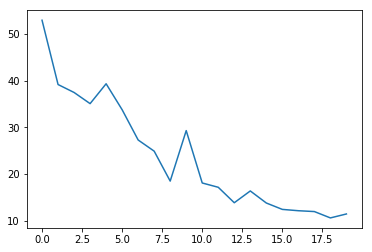

In [68]:
with open("output/losses.txt") as file:
    text = file.read()
i = 1300
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 20
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [64]:
with open("output/losses_details.txt") as file:
    text = file.read()
    
losses = []
pieces = []
rewards = []
data = np.array([x.split(" ") for x in text.split("\n")])
for d in data[:-1]:
    losses.append(float(d[0]))
    rewards.append(float(d[1]))
    pieces.append(int(d[2]))

#if len(losses)> 16000:
#    losses = losses[-16000:]
#    rewards = rewards[-16000:]
#    pieces = pieces[-16000:]
    
lo = np.array(losses) 
print(len(rewards), len(lo[lo<50]), len(lo[lo>100]))

1248 1068 81


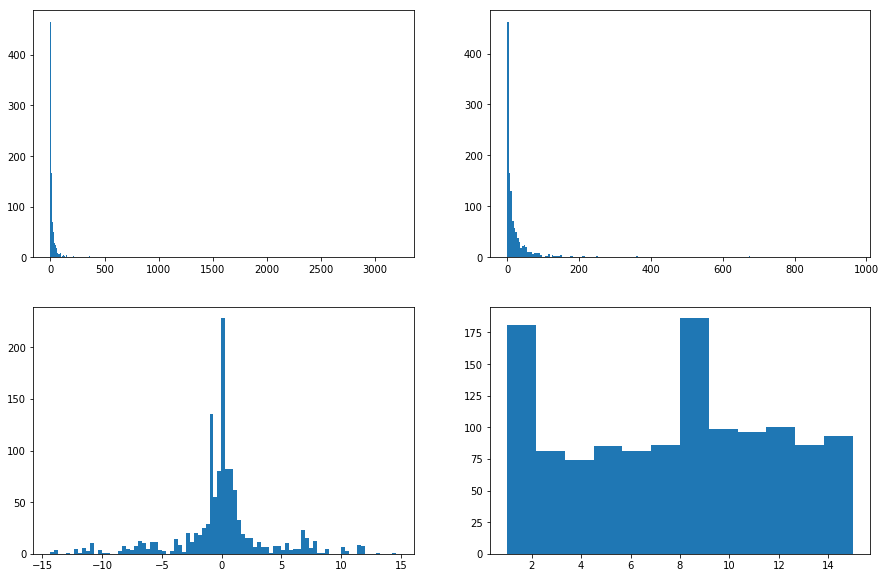

In [65]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].hist(losses,'auto')
xarr[0,1].hist(lo[lo<1000],'auto')
xarr[1,0].hist(rewards,'auto')
xarr[1,1].hist(pieces,'auto')
plt.show()

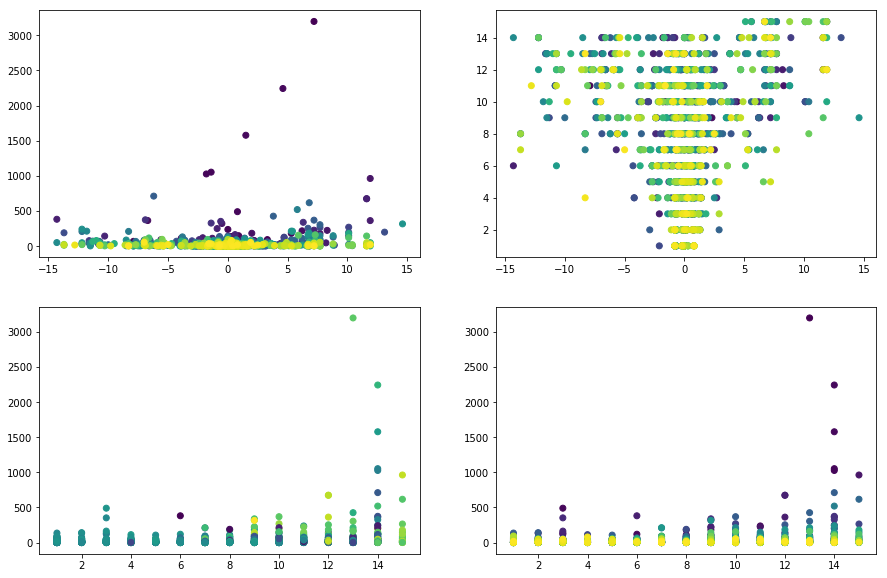

In [66]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards, losses, c=range(len(pieces)))
xarr[0,1].scatter(rewards, pieces,c=range(len(pieces)))
xarr[1,0].scatter(pieces, losses,c=rewards)
xarr[1,1].scatter(pieces, losses,c=range(len(rewards)))
plt.show()

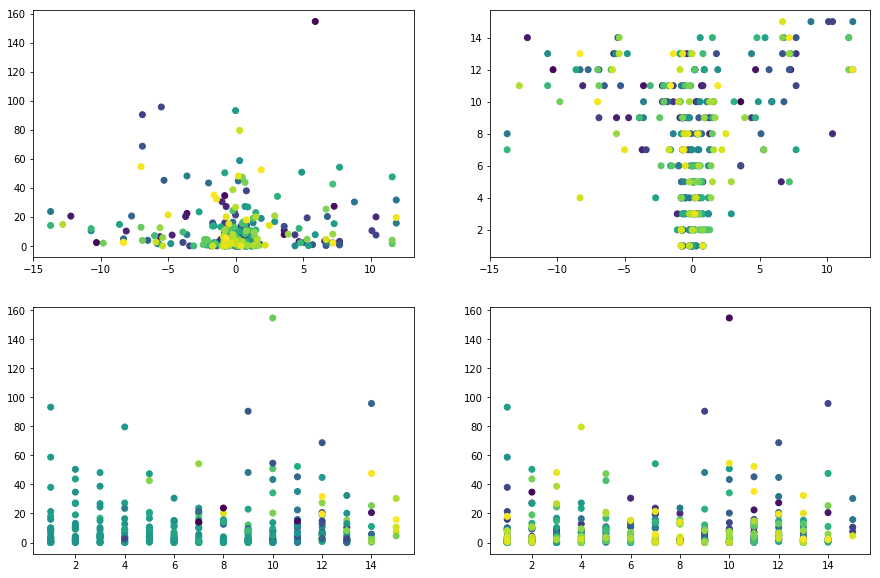

In [67]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards[-320:], losses[-320:], c=range(320))
xarr[0,1].scatter(rewards[-320:], pieces[-320:],c=range(320))
xarr[1,0].scatter(pieces[-320:], losses[-320:],c=rewards[-320:])
xarr[1,1].scatter(pieces[-320:], losses[-320:],c=range(320))
plt.show()

## Network visualization

In [50]:
from keras import initializers
from keras.initializers import normal, identity
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD , Adam
LEARNING_RATE = 1e-4

def build_model():
    print("Now we build the model")
    model = Sequential()
    model.add(Conv2D(32, (2,3), strides=(1, 1), input_shape=(4,16,3), name="conv1"))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (2,3), strides=(1, 1), name="conv2"))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512, name="dense"))
    model.add(Activation('relu'))
    model.add(Dense(1, name="output"))
        
    adam = Adam(lr=LEARNING_RATE)
    model.compile(loss='mse',optimizer=adam)
    #plot_model(model,show_shapes=True, to_file='model.png')
    print("We finish building the model")
    return model



In [51]:
model = build_model()
model.load_weights("output/model.h5")
adam = Adam(lr=LEARNING_RATE)
model.compile(loss='mse',optimizer=adam)
print("Weights loaded!")

Now we build the model
We finish building the model
Weights loaded!


In [54]:
sequential_model_to_ascii_printout(model)
layers = model.layers

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      4   16    3
              Conv2D    \|/  -------------------       608     0.1%
                relu   #####      3   14   32
              Conv2D    \|/  -------------------     12352     1.5%
                relu   #####      2   12   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        1536
               Dense   XXXXX -------------------    786944    98.3%
                relu   #####         512
               Dense   XXXXX -------------------       513     0.1%
                       #####           1


Gameboard


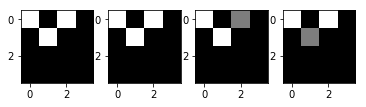

Spaces:  [(0, 1), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Item D, LeftItems: EFGHIJKLMNOP
Left items image


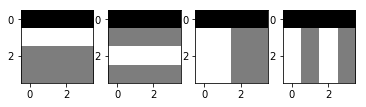

In [17]:
from Quarto import *
g = Gameboard()
g.apply_moves([((0,0),"A"), ((1,1),"B"),((0,2),"C")])
left = [l for l in"EFGHIJKLMNOP"]
s = Status(g, "D", left, left_items_image(left))
s.show()

In [21]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations



img = visualize_activation(model,3 , filter_indices=24, seed_input=actimg,verbose=True, tv_weight=0 , lp_norm_weight=0)



Iteration: 1, named_losses: <zip object at 0x7fe34b556dc8>, overall loss: -22.497243881225586
Iteration: 2, named_losses: <zip object at 0x7fe34b556f48>, overall loss: -29.042510986328125
Iteration: 3, named_losses: <zip object at 0x7fe34b556f88>, overall loss: -33.630126953125
Iteration: 4, named_losses: <zip object at 0x7fe34b556688>, overall loss: -37.23215103149414
Iteration: 5, named_losses: <zip object at 0x7fe34b556d88>, overall loss: -40.444271087646484
Iteration: 6, named_losses: <zip object at 0x7fe34b556688>, overall loss: -43.596954345703125
Iteration: 7, named_losses: <zip object at 0x7fe34b556fc8>, overall loss: -46.37220764160156
Iteration: 8, named_losses: <zip object at 0x7fe34b561108>, overall loss: -48.94406509399414
Iteration: 9, named_losses: <zip object at 0x7fe34b561148>, overall loss: -51.38579177856445
Iteration: 10, named_losses: <zip object at 0x7fe34b561188>, overall loss: -53.7602653503418
Iteration: 11, named_losses: <zip object at 0x7fe34b5611c8>, overall

Iteration: 91, named_losses: <zip object at 0x7fe34b561cc8>, overall loss: -181.46690368652344
Iteration: 92, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -182.8280792236328
Iteration: 93, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -184.2147979736328
Iteration: 94, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -185.60032653808594
Iteration: 95, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -186.9736328125
Iteration: 96, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -188.3900146484375
Iteration: 97, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -189.7748565673828
Iteration: 98, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -191.1836395263672
Iteration: 99, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -192.56358337402344
Iteration: 100, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -193.9563751220703
Iteration: 101, named_losses: <zip object at 0x7fe3740b7888

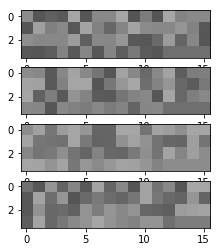

In [22]:
show_action_image(img)

In [2]:
from Quarto import *


Using TensorFlow backend.


In [23]:
replay_memory = Experience(10, 4, 0.5)

In [24]:
replay_memory.add((1),20)
replay_memory.add((2),100)
replay_memory.add((3),30)
replay_memory.add((4),3000)
replay_memory.add((5),1000)

In [25]:
replay_memory.select(0.4)

([5, 4, 2, 3],
 array([ 0.49593442,  0.39810717,  0.78600309,  1.        ]),
 [4, 3, 1, 2])

In [26]:
replay_memory.tree.print_tree()

22.99900223131502 
22.99900223131502 0 
17.37558897941153 5.623413251903491 0 0 
7.63441361516796 9.74117536424357 5.623413251903491 0 0 0 0 0 
4.47213595499958 3.1622776601683795 2.340347319320716 7.400828044922853 5.623413251903491 0 0 0 0 0 0 0 0 0 0 0 
